In [244]:
import numpy as np

# Naives Bayes Classifier

Dans cette série il y a deux partie. La prémière utilisera un dataset très simple pour mettre en place les étapes de traitement. 
Dans la deuxième étape, un dataset plus consequent sera utilisé. 

## The dataset

In [245]:
# Assigning features and label variables

# Feature 1
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

# Feature 2
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

### TODO 1 : Data preparation

#### - Encoder les labels entre 0 et 1 moins le nombre de classes.

Les modèles de Scikit-Learn ont besoin de chiffres pour les « labels ». 
La première tâche sera donc de transformer (encoder) les labels en chiffres.
Pour ce faire, utiliser la bibliothèque ```LabelEncoder``` de Scikit-learn 

Cette opération est connue sous le nom de « label encoding »
#### - Faire la même chose pour les caractéristiques (_features_)


In [246]:
# Import LabelEncoder
from sklearn import preprocessing

In [247]:
# TODO: Convert string labels into numbers.
labEncoder = preprocessing.LabelEncoder()
label = labEncoder.fit_transform(play)


In [248]:
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [249]:
# TODO: Convert string features into numbers
weather_encoded = labEncoder.fit_transform(weather) #f1
temp_encoded = labEncoder.fit_transform(temp) #f2


In [250]:
print("Temp: ", temp_encoded)
print("Weather: ", weather_encoded)

Temp:  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Weather:  [2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [251]:
features = np.column_stack((temp_encoded, weather_encoded))
features.shape

(14, 2)

### TODO 2 - Génération du modèle
Générez un modèle d'apprentissage à l'aide du classificateur bayésien naïf en procédant comme suit :

* Créer un classificateur bayésien naïf (```GaussianNB```)
    * https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
* Entrainement : _Fit_ le jeu de données sur le classificateur
* Prédiction: Effectuer une prédiction (ex. overcast + mild) et prédire si le joueur jouera ou pas


In [252]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [253]:
# Create a Gaussian Classifier
clf = GaussianNB()
model = clf.fit(features, label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [0]


### TODO 3: utiliser le dataset en entrée pour estimer l'accuracy des vos predictions 
_(Attention ! on est en train de faire de l'overfit !)_

L'__accuracy__ (français: précision) est une mesure permettant d’évaluer les modèles de classification. Formellement, l'accuracy a la définition suivante :

\begin{equation*}
Accuracy =  \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions}
\end{equation*}

In [254]:
# your code here

accuracy = model.score(features, label)
print(f"Accuracy : {100*accuracy}%")
#OVERFIT : Car on test l'accuracy sur le jeu de données sur lequel on a fit, c'est inutile (litérallement de 
# l'apprentissage par coeur)


Accuracy : 71.42857142857143%


# Wine dataset

Jusqu'à présent, vous avez appliqué la classificateur Naïve Bayes avec des étiquettes binaires. Vous allez maintenant utiliser Naïve Bayes pour la classification avec plusieurs classes (>2). Ce qui est connu comme la classification multinomiale. 

Dans la partie construction du modèle, vous pouvez utiliser le jeu de données "wine dataset" qui est un très célèbre problème de classification multi-classes. "_This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars_" (source UC Irvine).

Le jeu de données comprend 13 caractéristiques (alcool, acide malique, cendres, alcalinité, magnésium, phénols totaux, flavonoïdes, phénols non flavanoïdes, proanthocyanines, intensité de la couleur, teinte, od280 / od315_de_diluted_wines, proline) et, comme label, le type de viticulture. Ces données ont trois types de vin : class_0, class_1 et class_3. 

GOAL : Le but ici est de construire un modèle pour classer le type de vin.

Le jeu de données est disponible directement dans la bibliothèque Scikit-learn.


In [255]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [256]:
print(type(wine.data), wine.data.shape)

<class 'numpy.ndarray'> (178, 13)


#### Mini-TODO: afficher les premières 4 lignes du dataset

In [257]:
# print the wine data features (top 4 records)
print(wine.data[:4])



[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]]


#### Mini-TODO: afficher les labels

In [258]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)

print(wine.target_names)




['class_0' 'class_1' 'class_2']


### TODO 4: splitting the data

First, you separate the columns into dependent and independent variables (or features and label). Then you split those variables into train and test set.
- Utiliser la methode __train_test_split__
- Utiliser 70% du data set pour l'entrainement et 30% pour le test

(note: fixer un random state, ex. 37)

In [259]:
from sklearn.model_selection import train_test_split

# Import train_test_split function
X_wine = wine.data
y_wine = wine.target

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3, train_size=0.7, random_state=37, shuffle=True)

### TODO 5: Entrainer le modèle

In [260]:
#Import Gaussian Naive Bayes model
clf = GaussianNB()
model = clf.fit(X_train, y_train)

### TODO 6: Evaluer les performances
- Afficher la matrice de confusion, via la méthode ```metrics.confusion_matrix``` ou ```plot_confusion_matrix```; dans la documentation de scikit-learn (ou dans les résultats) chercher comment les TP, TN, FP et FN sont ordonnés dans la matrice de confusion 
- Utiliser l'accuracy, via la méthode __metrics.accuracy_score__ sur les predictions sur le test set
- Utiliser le F1-score, via la méthode __metrics.f1_score__ sur les predictions sur le test set
    - Tester vos résultats avec ```average='macro'``` et  ```average='micro'```, quelle est la différence ?

Accuracy : 92.5925925925926%
Macro :
	F1 score micro : 0.9259259259259259
	F1 score macro : 0.9264121264121264


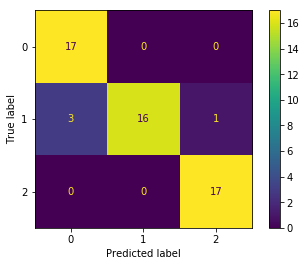

In [261]:
from sklearn import metrics
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

# make predicate
y_pred = model.predict(X_test)

#print stats
accuracy = metrics.accuracy_score(y_test, y_pred)
f1ScoreMicro = metrics.f1_score(y_test, y_pred, average="micro")
f1ScoreMacro = metrics.f1_score(y_test, y_pred, average="macro")

print(f"Accuracy : {100*accuracy}%\nMacro :\n\tF1 score micro : {f1ScoreMicro}\n\tF1 score macro : {f1ScoreMacro}")

#plot matrix
plot_confusion_matrix(model, X_test, y_test)
